# Дипломная работа по теме: «Анализ данных футбольных событий (поиск инсайтов, составление рекомендаций стейкхолдерам)»
Цели проекта:

Цель данного исследования — провести статистический анализ исполнения и реализации пенальти (штрафного 11-метрового удара) на основе датасета “Football Events”  и сформулировать практические рекомендации для тренерского штаба, направленные на повышение эффективности команды при штрафных ударах.

Бизнес-Задачи:

1. Оценка влияния пенальти на результат матча:
  - Частота назначения;
  - Процент реализации;      
  - Процент от общего числа голов;
2. Рейтинг игроков по эффективности исполнения пенальти:
  - Составить рейтинг игроков по качеству исполнения 11 - метрового удара для учета при проведении трансферов игроков;   
3. Подготовка вратарей:
  - Создание единого отчета по статистике исполнения 11 - метровых ударов по каждому игроку;
  - Определение предпочитаемые направления ударов (левый/правый угол, центр ворот).



# Блок 1.Описание исходного датасета и типов данных

In [ ]:
# загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

## Загрузка и просмотр данных

Для исследования был взят датасет "Football Events" со статистикой по играм  пяти крупнейших европейских футбольных лиг:
- Англии (Premier League)
- Германии (Bundesliga)
- Испании (La Liga)
- Италии (Serie A)
- Франции (Ligue 1)

с сезона 2011/2012 по сезон 2016/2017 по состоянию на 25.01.2017.

Датасет состоит из 3 файлов:
- events.csv - содержит данные о каждой игре
- dictionary.txt - содержит словарь с текстовым описанием каждой категориальной переменной, закодированной целыми числами
- ginf.csv - содержит метаданные и рыночные коэффициенты по каждой игре

### Загрузим файлы и посмотрим содержимое

In [ ]:
df_events = pd.read_csv('events.csv')

df_events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


Просмотр информации о датасете

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

Колонки id_odsp, id_odsp, id_event, sort_order, time, text, event_type, side, event_team, opponent, is_goal, assist_method, fast_break заполнены данными полностью. Колонки event_type2, player, player2, player_in, player_out, shot_place, shot_outcome, location, bodypart, situation имеют пропуски в данных.

1 id_odsp - Уникальный идентификатор матча

2 id_event - Уникальный идентификатор события в матче

3 sort_order - Порядковый номер события в матче

4 time - Время события (минута)

5 text - Текстовое описание события

6 event_type - Тип события (удар, передача, пенальти и т.д.)

7 event_type2 - Дополнительный тип события

8 side - Сторона (хозяева/гости)

9 event_team  - Команда, совершившая событие

10 opponent - Команда-соперник

11 player - Игрок, совершивший событие

12 player2 - Второй игрок, связанный с событием (ассистент)

13 player_in - Игрок, который вышел на замену

14 player_out - Игрок, который был заменен

15 shot_place - Место удара

16 shot_outcome - Результат удара

17 is_goal - Был ли забит гол (0 - нет, 1 - да)

18 location - Локация на поле, где произошло событие

19 bodypart - Часть тела, использованная для удара или передачи

20 assist_method - Метод ассиста

21 situation - Ситуация, в которой произошло событие

22 fast_break - Быстрая контратака (0 - нет, 1 - да)



Выполним для второго датасета.

In [ ]:
df_ginf = pd.read_csv('ginf.csv')

df_ginf.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [ ]:
df_ginf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


odd_over, odd_under, odd_bts, odd_bts_n имеют пропуски в данных.

1 id_odsp - Уникальный идентификатор матча

2 link_odsp - Ссылка на матч

3 adv_stats - Наличие расширенной статистики

4 date - Дата матча (YYYY-MM-DD)

5 league - Лига

6 season - Сезон

7 country - Страна

8 ht - Домашняя команда (Home Team)

9 at - Гостевая команда (Away Team)

10 fthg - Голы домашней команды (Full Time Home Goals)

11 ftag - Голы гостевой команды (Full Time Away Goals)

12 odd_h - Коэффициент на победу домашней команды

13 odd_d - Коэффициент на ничью

14 odd_a - Коэффициент на победу гостей

15 odd_over - Коэффициент на тотал больше (например, 2.5)

16 odd_under - Коэффициент на тотал меньше

17 odd_bts - Коэффициент на "Обе забьют" (Both Teams to Score)

18 odd_bts_n Коэффициент на "Обе НЕ забьют"



После анализа исходных датасетов колонки имеющие пропуски в данных не повлиют на проведение анализа ключевых метрик в рамках дипломного проекта. Данные пропущены в колонках с дополнительной стистикой (дополнительные коэфициенты и дополнительные игровые события).

## Посмотрим состав датасетов

### 1. Информация о странах и лигах

In [ ]:
unique_countries = df_ginf['country'].unique()
print(unique_countries)

['germany' 'france' 'england' 'spain' 'italy']


In [ ]:
unique_league = df_ginf['league'].unique()
print(unique_league)

['D1' 'F1' 'E0' 'SP1' 'I1']


Данные содержат информацию о матчах чемпионатов Германии, Франции, Англии, Испании и Италии.

### 2. Информация о временном периоде в датасете

In [ ]:
# Для этого необходимо преобразовать столбец в формат datetime
df_ginf['date'] = pd.to_datetime(df_ginf['date'])

# Находим минимальную и максимальную даты
start_date = df_ginf['date'].min()
end_date = df_ginf['date'].max()

print(f"Даты: с {start_date.strftime('%d-%m-%Y')} по {end_date.strftime('%d-%m-%Y')}")

Даты: с 05-08-2011 по 22-01-2017


### 3. Так как у каждого матча есть уникальный идентификатор посмотрим соответствует ли их количество в датасетах

In [ ]:
id_df_ginf = df_ginf['id_odsp'].unique()
len(id_df_ginf)

10112

In [ ]:
id_odsp_event = df_events['id_odsp'].unique()
len(id_odsp_event)

9074

Не все матчи из файла ginf есть в events. 1038 матчей не имеют расширеной статистики.

### 4. Статистика по распределению голов

In [ ]:
# Отфильтруем таблицу df_events по событиям где был забит гол
goals = df_events[(df_events['is_goal'] == 1)]
goals.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,5.0,1.0,1,3.0,1.0,1,1.0,0
50,UFot0hit/,UFot0hit51,51,49,"Goal! Borussia Dortmund 3, Hamburg 0. Kevin G...",1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,13.0,1.0,0,3.0,0
92,UFot0hit/,UFot0hit93,93,80,"Goal! Borussia Dortmund 3, Hamburg 1. Robert ...",1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,3.0,1.0,1,3.0,2.0,0,3.0,0
175,Aw5DflLH/,Aw5DflLH66,66,48,"Goal! FC Augsburg 0, SC Freiburg 1. Papiss De...",1,12.0,2,SC Freiburg,FC Augsburg,...,NaN,NaN,3.0,1.0,1,15.0,1.0,1,1.0,1


In [ ]:
# Создадим временные интервалы (по 15 минут)
# Будем использовать функцию cut
bins = [0, 15, 30, 45, 60, 75, 90, 100]
labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '90-100']

# Разбиваю голы по интервалам
goals['time_interval'] = pd.cut(goals['time'], bins=bins, labels=labels, right=False)

# Группируюпо интервалам
goals_by_interval = goals['time_interval'].value_counts().sort_index()
print(goals_by_interval)

time_interval
0-15      2833
16-30     3543
31-45     3774
46-60     4325
61-75     4182
76-90     4276
90-100    1513
Name: count, dtype: int64


/tmp/ipython-input-13-4012170577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals['time_interval'] = pd.cut(goals['time'], bins=bins, labels=labels, right=False)


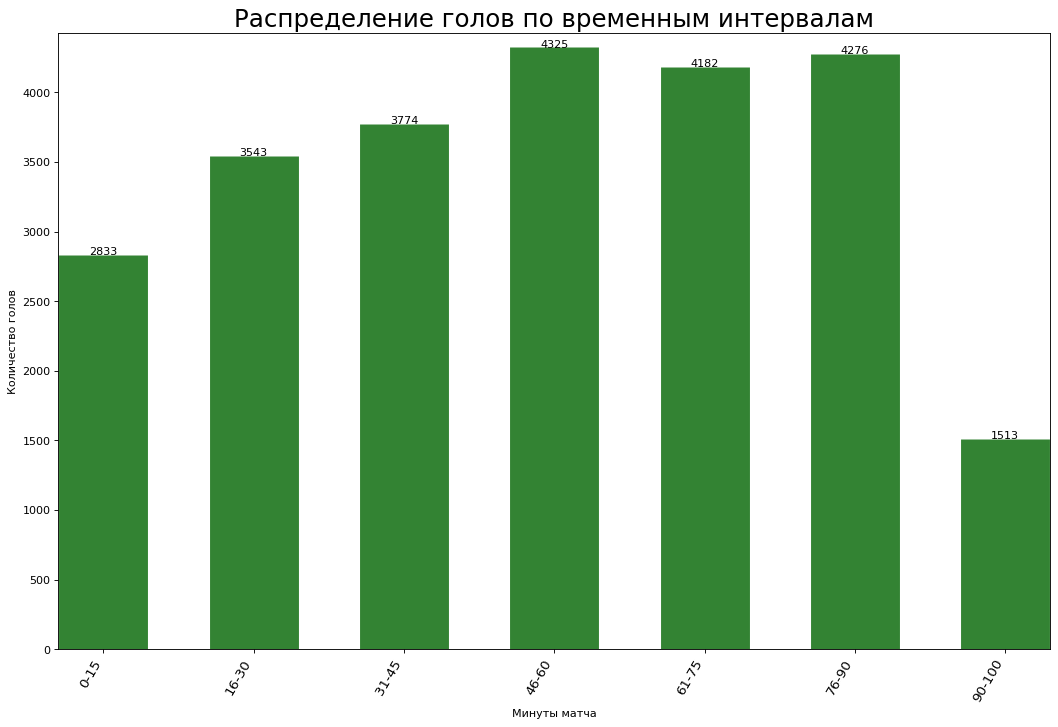

In [ ]:
# Построим график распределения голов
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=goals_by_interval.index, ymin=0, ymax=goals_by_interval.values, color='#2ecc71', edgecolor='darkgreen', alpha=0.8, linewidth=80)

# Подписи значений
for i, count in enumerate(goals_by_interval.values):
  ax.text(i, count+0.5, str(count), horizontalalignment='center')

# Название, метка
ax.set_title('Распределение голов по временным интервалам', fontdict={'size':22})
ax.set(ylabel='Количество голов', xlabel='Минуты матча', ylim=(0, goals_by_interval.max()+100))
plt.xticks(range(len(goals_by_interval)), goals_by_interval.index, rotation=60, horizontalalignment='right', fontsize=12)
plt.show()

In [ ]:
# Посмотрим статистику распределения голов по таймам
first_half_goals = df_events[(df_events['is_goal'] == 1) & (df_events['time'] <= 45)].shape[0]
second_half_goals = df_events[(df_events['is_goal'] == 1) & (df_events['time'] > 45)].shape[0]

print(f"Голов в первом тайме: {first_half_goals}")
print(f"Голов во втором тайме: {second_half_goals}")

Голов в первом тайме: 10744
Голов во втором тайме: 13702


Проведя анализ статистики распределения голов по временным интервалам можно сделать следущие выводы:
 - Больше голов забивается во втором тайме.
 - Самое большое количество голов забивается после 75 минуты (с учетом дополнительного времени).



# Блок 2.  Подготовка, очистка и преобразование данных

### 1. Отфильтруем таблицу df_events оставив только столбцы необходимые для анализа

In [ ]:
filter_df_events = df_events.loc[:, ['id_odsp', 'time', 'text', 'event_type', 'event_team', 'opponent', 'player', 'player2', 'shot_place', 'shot_outcome', 'is_goal','location', 'bodypart']]
filter_df_events.head()

,id_odsp,time,text,event_type,event_team,opponent,player,player2,shot_place,shot_outcome,is_goal,location,bodypart
0,UFot0hit/,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,6.0,2.0,0,9.0,2.0
1,UFot0hit/,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,0,NaN,NaN
2,UFot0hit/,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,0,NaN,NaN
3,UFot0hit/,7,Foul by Sven Bender (Borussia Dortmund).,3,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,0,NaN,NaN
4,UFot0hit/,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,0,2.0,NaN


In [ ]:
filter_df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_odsp       941009 non-null  object 
 1   time          941009 non-null  int64  
 2   text          941009 non-null  object 
 3   event_type    941009 non-null  int64  
 4   event_team    941009 non-null  object 
 5   opponent      941009 non-null  object 
 6   player        880009 non-null  object 
 7   player2       291310 non-null  object 
 8   shot_place    227459 non-null  float64
 9   shot_outcome  228498 non-null  float64
 10  is_goal       941009 non-null  int64  
 11  location      467067 non-null  float64
 12  bodypart      229185 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 93.3+ MB


### 2. Отфильтруем таблицу df_events по событиям где есть пенальти

In [ ]:
# Будем искать описанию события 'text' и по месту события 'location'
penalty = filter_df_events[(filter_df_events['text'].str.contains('penalty', case=False, na=False)) & (filter_df_events['location'] == 14)]
penalty.head()


,id_odsp,time,text,event_type,event_team,opponent,player,player2,shot_place,shot_outcome,is_goal,location,bodypart
1568,xtklbWLh/,18,"Goal! Hannover 1, 1899 Hoffenheim 1. Sejad Sa...",1,TSG Hoffenheim,Hannover 96,sejad salihovic,NaN,12.0,1.0,1,14.0,2.0
1579,xtklbWLh/,30,"Goal! Hannover 2, 1899 Hoffenheim 1. Mohammed...",1,Hannover 96,TSG Hoffenheim,mohammed abdellaoue,NaN,3.0,1.0,1,14.0,2.0
1821,84Llk2m6/,56,"Goal! Bordeaux 1, St Etienne 2. Jussie (Borde...",1,Bordeaux,St Etienne,jussie,NaN,3.0,1.0,1,14.0,1.0
1908,fLN0n0XO/,32,Penalty missed! Bad penalty by Julien FA©ret (...,1,Stade Rennes,Dijon FCO,julien feret,NaN,1.0,2.0,0,14.0,1.0
1946,fLN0n0XO/,57,"Penalty missed! Still Dijon 1, Rennes 3. Greg...",1,Stade Rennes,Dijon FCO,gregory thil,NaN,7.0,4.0,0,14.0,1.0


# Блок 3. Анализ данных для стейкхолдеров

## 1. Оценка влияния пенальти на результат матча

In [ ]:
# Общая статистика
# Найдем общее количество пенальти
total_penalties = len(penalty)
print(f"Общее количество пенальти: {total_penalties}")

# Найдем количество забитых пенальти
penalty_goals = penalty[penalty['is_goal'] == 1]
total_penalty_goals = len(penalty_goals)
print(f"Количество забитых пенальти: {total_penalty_goals}")

# Рассчитаем процент реализации
penalty_conversion = (total_penalty_goals / total_penalties) * 100
print(f"Процент реализации пенальти: {penalty_conversion:.1f}%")

# Найдем общее число голов
total_goals = len(filter_df_events[filter_df_events['is_goal'] == 1])
print(f"Общее количество голов: {total_goals}")

# Расчитаем долю пенальти от общего числа голов
penalty_goals_share = (total_penalty_goals / total_goals) * 100
print(f"Доля пенальти от общего числа голов: {penalty_goals_share:.2f}%")

Общее количество пенальти: 2596
Количество забитых пенальти: 1989
Процент реализации пенальти: 76.6%
Общее количество голов: 24446
Доля пенальти от общего числа голов: 8.14%


### Частота назначения

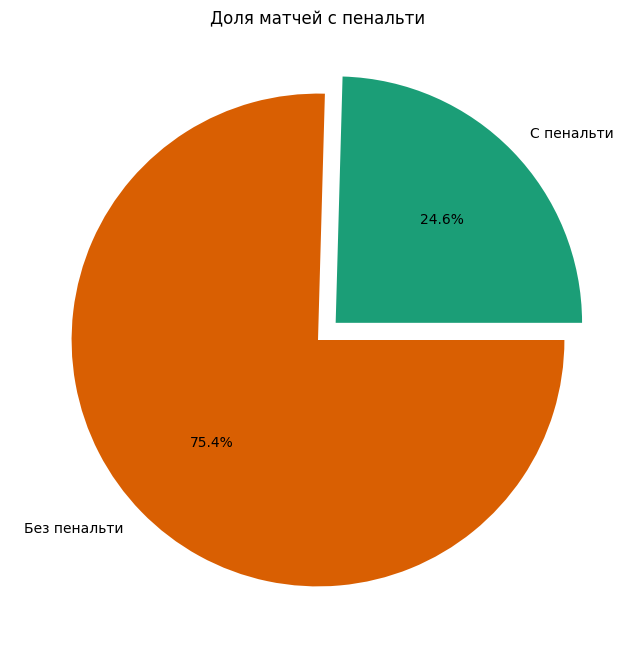

In [ ]:
# Подсчет матчей с пенальти и без
total_matches = len(id_odsp_event)
penalty_matches = len(filter_df_events[(filter_df_events['text'].str.contains('penalty', case=False, na=False)) & (filter_df_events['location'] == 14)]['id_odsp'].unique())

no_penalty_matches = total_matches - penalty_matches

# Настройка данных для диаграммы
labels = ['С пенальти', 'Без пенальти']
sizes = [penalty_matches, no_penalty_matches]
colors = plt.cm.Dark2.colors
explode = (0.1, 0)  # Выделяем сектор "С пенальти"

# Построение диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title("Доля матчей с пенальти")
plt.show()

### Процент реализации

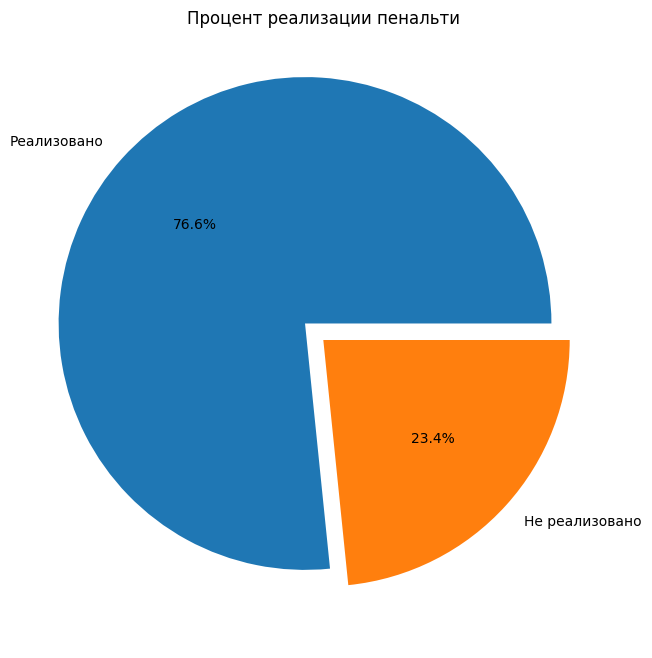

In [ ]:
# Процент реализации пенальти
penalty_success = penalty_conversion
missed_penalties = 100 - penalty_success

# Настройка данных для диаграммы
labels = ['Реализовано', 'Не реализовано']
sizes = [penalty_success, missed_penalties]
colors = plt.cm.tab10.colors
explode = (0.1, 0)  # Выделяем сектор "С пенальти"

# Построение диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title("Процент реализации пенальти")
plt.show()

### Процент от общего числа голов

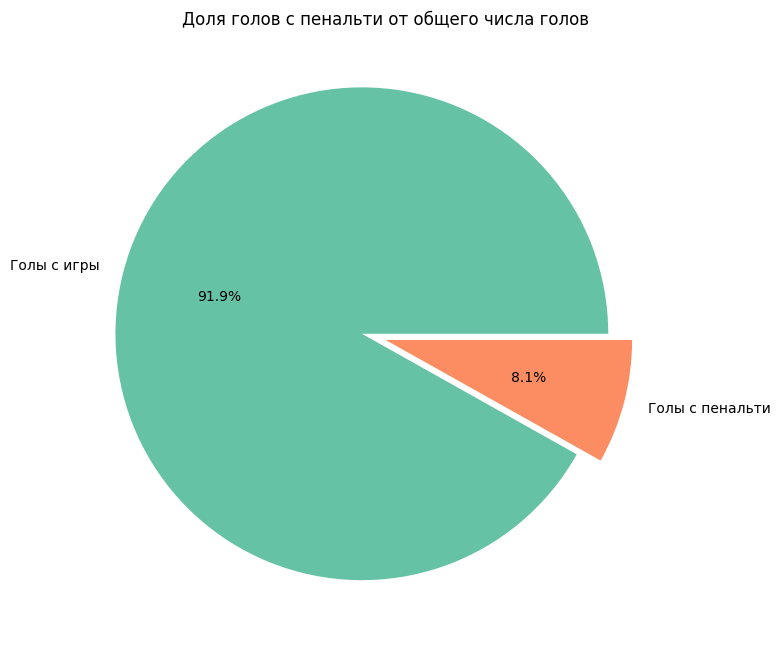

In [ ]:
non_penalty_goals = total_goals - total_penalty_goals

# Настройка данных для диаграммы
labels = ['Голы с игры', 'Голы с пенальти']
sizes = [non_penalty_goals, total_penalty_goals]
colors = plt.cm.Set2.colors
explode = (0.1, 0)  # Выделяем сектор "С пенальти"

# Построение диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title("Доля голов с пенальти от общего числа голов")
plt.show()

Проведенный анализ статистических данных позволяет сделать следующие выводы:

- Высокая частота назначения пенальти

  В 24,6% футбольных матчей назначается минимум один 11-метровый удар, что свидетельствует о значительном влиянии данного игрового эпизода на ход встречи.

- Качество реализации пенальти

  Точность исполнения пенальти составляет 76,6%, что означает высокую эффективность. Эффективность пенальти зависит не только от точности бьющего, но и от действий вратаря. Это подтверждает необходимость специализированных тренировок вратарей в отражении 11-метровых ударов и психологической подготовки исполнителей.

- Вклад пенальти в общую результативность

  Доля голов, забитых с пенальти, составляет 8,1% от общего количества забитых мячей. Этот показатель демонстрирует, что пенальти оказывают существенное влияние на набор очков командой в течении сезона.

Заключение:

Пенальти являются значимым фактором, влияющим на результат футбольных матчей. Их высокая реализация (76,6%) в сочетании с заметной долей в общей статистике голов (8,1%) подчеркивает необходимость совершенствования методик подготовки игроков и вратарей к данным игровым ситуациям. Дальнейшее исследование направлено на выявление и проверку метрик для оценки индивидуальных показателей игроков.

## 2 Рейтинг игроков по эффективности исполнения пенальти

In [ ]:
# Сгруппируем игроков по количеству пенальти и сумме голов
penalty_group = penalty.groupby('player').agg(total_penalties=('is_goal', 'count'), goals_scored=('is_goal', 'sum'))
penalty_group.head()

,total_penalties,goals_scored
player,,
aaron,1,0
aaron hunt,11,9
abdel barrada,1,0
abdoul camara,1,0
abel hernandez,3,3


In [ ]:
# Добавим столбец с процентом исполнения
penalty_group['success_rate'] = round((penalty_group['goals_scored'] / penalty_group['total_penalties']) * 100, 2)

# Сортируем сначала по количеству пенальти, затем по проценту реализации
penalty_group = penalty_group.sort_values(by=['total_penalties', 'success_rate'], ascending=[False, False])

penalty_group.head(10)

,total_penalties,goals_scored,success_rate
player,,,
cristiano ronaldo,51,43,84.31
zlatan ibrahimovic,38,35,92.11
lionel messi,37,30,81.08
edinson cavani,27,20,74.07
falcao,22,20,90.91
antonio candreva,22,18,81.82
sejad salihovic,21,19,90.48
alexandre lacazette,21,18,85.71
mauricio pinilla,20,14,70.00


## 3. Подготовка вратарей

In [ ]:
# Находим пенальти с участием игрока
name = 'ronaldo'
player_name = penalty[penalty['player'].str.split().str[-1] == name]
player_name.head(10)

,id_odsp,time,text,event_type,event_team,opponent,player,player2,shot_place,shot_outcome,is_goal,location,bodypart
9803,bBByVmEG/,60,"Goal! Real Madrid 2, Getafe 1. Cristiano Rona...",1,Real Madrid,Getafe,cristiano ronaldo,NaN,4.0,1.0,1,14.0,1.0
21769,MXdukFe0/,51,"Goal! Real Madrid 3, Rayo Vallecano 1. Cristi...",1,Real Madrid,Rayo Vallecano,cristiano ronaldo,NaN,12.0,1.0,1,14.0,1.0
21807,MXdukFe0/,84,"Goal! Real Madrid 6, Rayo Vallecano 2. Cristi...",1,Real Madrid,Rayo Vallecano,cristiano ronaldo,NaN,NaN,1.0,1,14.0,1.0
45176,AJYrgIcR/,54,"Goal! Real Madrid 4, Osasuna 1. Cristiano Ron...",1,Real Madrid,Osasuna,cristiano ronaldo,NaN,4.0,1.0,1,14.0,1.0
51845,KhAeigSt/,24,"Goal! Real Madrid 1, AtlA©tico de Madrid 1. C...",1,Real Madrid,Atletico Madrid,cristiano ronaldo,NaN,3.0,1.0,1,14.0,1.0
51914,KhAeigSt/,82,"Goal! Real Madrid 4, AtlA©tico de Madrid 1. C...",1,Real Madrid,Atletico Madrid,cristiano ronaldo,NaN,3.0,1.0,1,14.0,1.0
65001,vcixJMWd/,85,"Goal! FC Sevilla 1, Real Madrid 5. Cristiano ...",1,Real Madrid,Sevilla,cristiano ronaldo,NaN,4.0,1.0,1,14.0,1.0
76296,EVofMJoj/,47,"Goal! Real Madrid 2, Athletic de Bilbao 1. Cr...",1,Real Madrid,Athletic Bilbao,cristiano ronaldo,NaN,12.0,1.0,1,14.0,1.0
76318,EVofMJoj/,67,"Goal! Real Madrid 3, Athletic de Bilbao 1. Cr...",1,Real Madrid,Athletic Bilbao,cristiano ronaldo,NaN,3.0,1.0,1,14.0,1.0
88067,jeV5wtMl/,45,"Goal! Real Madrid 1, Levante 1. Cristiano Ron...",1,Real Madrid,Levante,cristiano ronaldo,NaN,13.0,1.0,1,14.0,1.0


In [ ]:
# Создаем функцию которая по таблице penalty и имени игрока ввыводит индивидуальную статистику
def analyze_penalties(penalty, name):
  # Фильтрация пенальти для конкретного игрока
  player_penalties = penalty[penalty['player'].str.split().str[-1].str.lower() == name.lower()]

  # Общее количество пенальти
  total_penalties = len(player_penalties)

  # Реализованные пенальти (голы)
  successful_penalties = player_penalties[player_penalties['is_goal'] == 1]

  # Промазанные пенальти
  missed_penalties = player_penalties[player_penalties['is_goal'] == 0]

  # Имя игрока
  player_full_name = player_penalties['player'].iloc[0]


  # Бьющая нога
  if (player_penalties['bodypart'] == 1).any():
    foot = "правая"
  elif (player_penalties['bodypart'] == 2).any():
    foot = "левая"
  else:
    foot = "нога не указана"

  # Вывод статистики
  print(f'''
  Статистика пенальти {player_full_name}:
  --------------------------------
  Всего пробито пенальти: {total_penalties}
  Реализовано: {len(successful_penalties)} ({len(successful_penalties)/total_penalties:.0%})
  Промахов: {len(missed_penalties)}
  Бьющая нога: {foot}
  ''')

  # Создаем матрицу 3x3 для зон ворот
  zone_matrix = np.zeros((3, 3))

  # Создаем для shot_place (Место удара) зоны на диаграмме
  zone_mapping = {
    3: (2, 0),   # Нижний левый
    4: (2, 2),    # Нижний правый
    5: (1, 1),    # Центр ворот
    11: (0, 1),   # Верхний центр
    12: (0, 0),   # Верхний левый
    13: (0, 2)    # Верхний правый
  }

  # Заполняем матрицу данными через цикл for
  for zone, count in player_penalties['shot_place'].value_counts().items():
    if zone in zone_mapping:
      x, y = zone_mapping[zone]
      zone_matrix[x, y] = count

  # Создаем датафрейм т.к. в таблице нет расшифровки
  zone_df = pd.DataFrame(zone_matrix, index=['Верх', 'Центр', 'Низ'], columns=['Левый', 'Центр', 'Правый'])

  # Построение диаграммы
  plt.figure(figsize=(12, 10), dpi=80)
  sns.heatmap(zone_df, xticklabels=zone_df.columns, yticklabels=zone_df.index, cmap='RdYlGn', center=0, annot=True)

  # Декорации
  plt.title(f'Распределение пенальти {player_full_name} по зонам ворот', fontsize=22)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12, rotation=0)

  plt.show()


  Статистика пенальти cristiano ronaldo:
  --------------------------------
  Всего пробито пенальти: 51
  Реализовано: 43 (84%)
  Промахов: 8
  Бьющая нога: правая
  


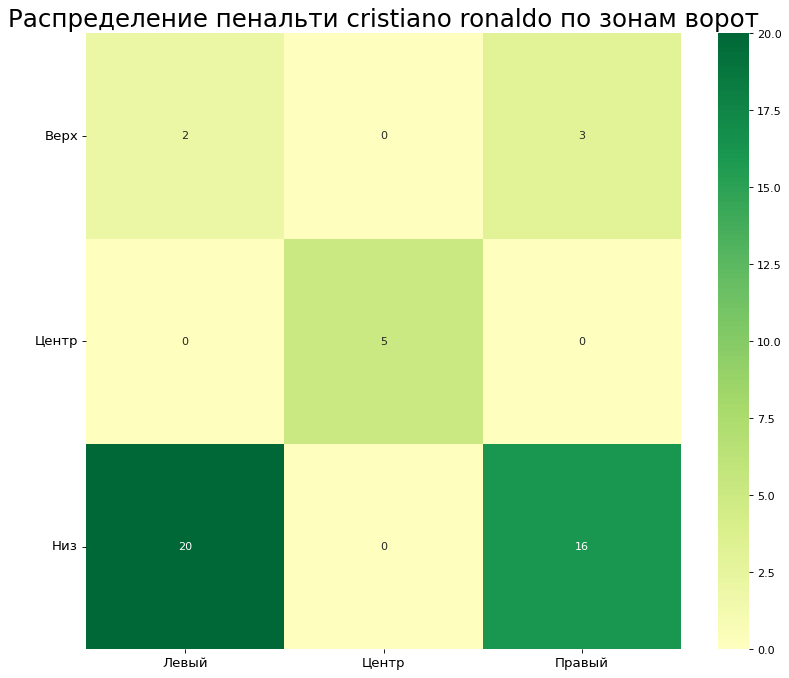

In [ ]:
# Запускаем функцию
analyze_penalties(penalty, name)

Составление рейтинга эффективности исполнения пенальти игроков, а так же подробная информация по индивидуальной статистике игрока позволит тренерскому штабу футбольного клуба:

- Выявлять игроков с высокой реализацией пенальти для усиления состава.

- Сравнивать игроков одной позиции по дополнительному критерию (% реализации, ударная нога).

- Более качественно проводить тренировки вратарей делая акцент на индивидуальных особенностях соперника.

### Оценка влияния ударной ноги футболиста на качество исполнения пенальти

1 - right foot (Правая нога)

2 - left foot (Левая нога)


Процент пенальти, пробитых правой ногой: 77.2%
Процент пенальти, пробитых левой ногой: 22.8%


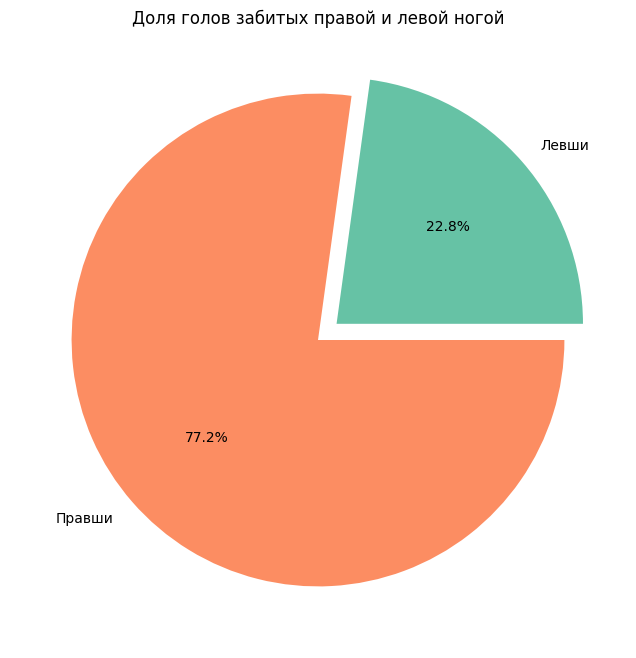

In [ ]:
# Считаем количество пенальти правой и левой ногой
right_foot = penalty_goals[penalty_goals['bodypart'] == 1]
left_foot = penalty_goals[penalty_goals['bodypart'] == 2]

# Рассчитываем проценты
percent_right = (len(right_foot) /total_penalty_goals) * 100
percent_left = (len(left_foot) / total_penalty_goals) * 100

# Выводим результаты
print(f"Процент пенальти, пробитых правой ногой: {percent_right:.1f}%")
print(f"Процент пенальти, пробитых левой ногой: {percent_left:.1f}%")

# Визуализация
# Настройка данных для диаграммы
labels = ['Левши', 'Правши']
sizes = [percent_left, percent_right]
colors = plt.cm.Set2.colors
explode = (0.1, 0)  # Выделяем сектор

# Построение диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title("Доля голов забитых правой и левой ногой")
plt.show()

In [ ]:
# Расчитаем процент реализации 11 метровых ударов правшей и левшей
total_right = penalty[penalty['bodypart'] == 1]
total_left = penalty[penalty['bodypart'] == 2]

right_conversion = (len(right_foot) / len(total_right)) * 100
left_conversion = (len(left_foot) / len(total_left)) * 100

print(f"Процент реализации правшей: {right_conversion:.1f}%")
print(f"Процент реализации левшей: {left_conversion:.1f}%")

Процент реализации правшей: 76.0%
Процент реализации левшей: 78.8%


Вывод: несмотря на преобладание правшей над левшами (77,2% и 22,8%) качество реализации практически не отличается (76,0% и 78,8%), поэтому данный критерий не должен учитываться при выборе исполнителя пенальти.

### Статистика распределения по зонам ворот ударов при пенальти левшей и правшей.

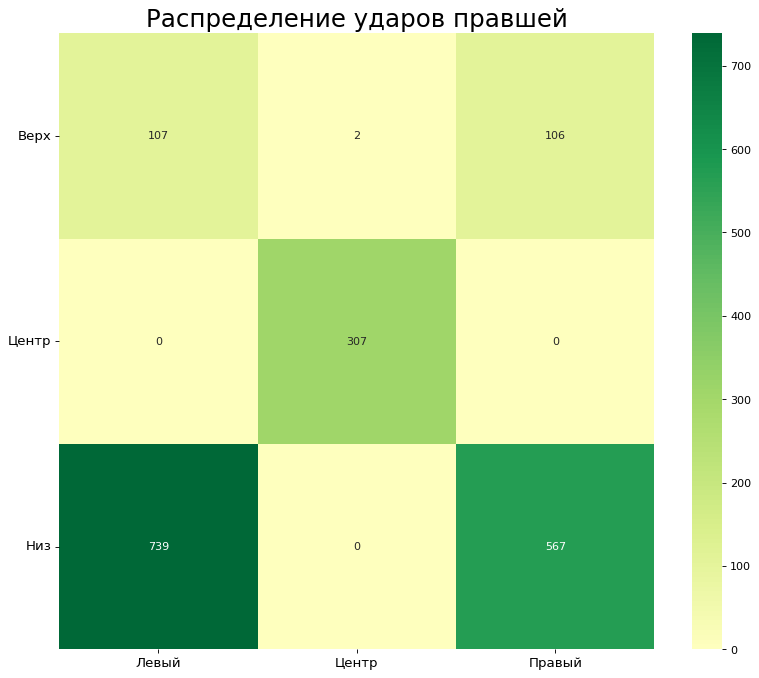

In [ ]:
# Создаем матрицу 3x3 для зон ворот
zone_matrix = np.zeros((3, 3))

# Создаем для shot_place (Место удара) зоны на диаграмме
zone_mapping = {
  3: (2, 0),   # Нижний левый
  4: (2, 2),    # Нижний правый
  5: (1, 1),    # Центр ворот
  11: (0, 1),   # Верхний центр
  12: (0, 0),   # Верхний левый
  13: (0, 2)    # Верхний правый
}

# Заполняем матрицу данными через цикл for
for zone, count in total_right['shot_place'].value_counts().items():
  if zone in zone_mapping:
    x, y = zone_mapping[zone]
    zone_matrix[x, y] = count

# Создаем датафрейм т.к. в таблице нет расшифровки
zone_df = pd.DataFrame(zone_matrix, index=['Верх', 'Центр', 'Низ'], columns=['Левый', 'Центр', 'Правый'])

# Построение диаграммы
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(zone_df, xticklabels=zone_df.columns, yticklabels=zone_df.index, cmap='RdYlGn', center=0, annot=True, fmt='.0f')

# Декорации
plt.title(f'Распределение ударов правшей', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.show()

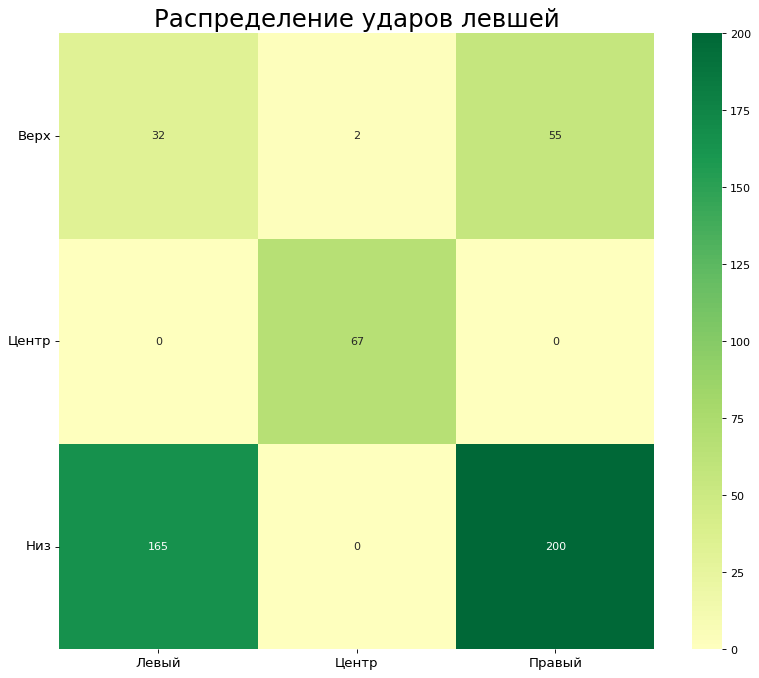

In [ ]:
# Создаем матрицу 3x3 для зон ворот
zone_matrix = np.zeros((3, 3))

# Создаем для shot_place (Место удара) зоны на диаграмме
zone_mapping = {
  3: (2, 0),   # Нижний левый
  4: (2, 2),    # Нижний правый
  5: (1, 1),    # Центр ворот
  11: (0, 1),   # Верхний центр
  12: (0, 0),   # Верхний левый
  13: (0, 2)    # Верхний правый
}

# Заполняем матрицу данными через цикл for
for zone, count in total_left['shot_place'].value_counts().items():
  if zone in zone_mapping:
    x, y = zone_mapping[zone]
    zone_matrix[x, y] = count

# Создаем датафрейм т.к. в таблице нет расшифровки
zone_df = pd.DataFrame(zone_matrix, index=['Верх', 'Центр', 'Низ'], columns=['Левый', 'Центр', 'Правый'])

# Построение диаграммы
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(zone_df, xticklabels=zone_df.columns, yticklabels=zone_df.index, cmap='RdYlGn', center=0, annot=True, fmt='.0f')

# Декорации
plt.title(f'Распределение ударов левшей', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.show()

Выводы:
- Проведенный анализ показывает, что в большинстве случаев правши бьют в левый от себя угол ворот, а левши — в правый.
- Результативнее удары в нижние углы ворот.

# Заключение

Принято считать, что исход пенальти (штрафного 11-метрового удара) преимущественно определяется фактором везения, приближая его к лотерее. Однако проведенное исследование на основе анализа 2596 пенальти из пяти ведущих европейских лиг с 2011 по 2017 годы демонстрирует статистически значимые закономерности, опровергающие данное предположение.

1.  Пенальти влияют на 24.6% матчей, их реализация — 76.6% - существенно превышает случайное распределение.
2.  Выявлена закономерность по ударам правшей и левшей (правши чаше бьют в левый от себя угол ворот, а левши — в правый).     
3.  Удары в нижние углы ворот результативнее, чем в другие зоны ворот.

По бизнес - задачам:

1.   Исходные данные были преобразованы и отфильтрованы.
2.   На основе анализа данных были приведены обоснования о значимости пенальти как для отдельного матча, так и на набор очков командой в течении сезона.  
3.  Составлен рейтинг игроков по эффективности исполнения пенальти.
4.  Разработан алгоритм и форма отчета для определения индивидуальных характеристик исполнителя пенальти.

Результаты анализа данных по бизнес - задачам будут полезны тренерским штабам футбольных команд при подготовке команды к сезону.

Практическая значимость для стейкхолдеров:

*   Научно обоснованный выбор исполнителей пенальти.
*   Объективные критерии оценки игроков при трансферах.
*   Оптимизация тренировочного процесса по отработке 11-метровых ударов.
*   Персонализированная подготовка вратарей.
*   Методика сбора и обработки данных по пенальти.

В ходе анализа была выявлена недостаточность информативности данных для предоставления четких выводов, поэтому для улучшения качества данных необходимо доработать отчет и дополнить колонками со следующей информацией:


- Позиция игрока на поле.

- Фамилия и имя вратаря при розыгрыше пенальти.

- Антропометрические данные вратаря.

- Направление прыжка вратаря.

- Погодные условия.

